<h1>Vehicle Fuel Economy Prediction</h1>

The goal of this project is to predict fuel consumption, aka 'combined MPG', from cars' attributes.<br><br>

Supervised machine learning method implementation step are:
<ol>
  <li>EDA</li>
  <li>feature engineering</li>
  <li>feature selection</li>
  <li>regression</li>
  <li>discussion</li>
</ol>
This notebook includes step 1.

Link to the dataset: https://www.kaggle.com/epa/fuel-economy

<b>Content</b><br>
The purpose of EPA’s fuel economy estimates is to provide a reliable basis for comparing vehicles. Most vehicles in the database (other than plug-in hybrids) have three fuel economy estimates: a “city” estimate that represents urban driving, in which a vehicle is started in the morning (after being parked all night) and driven in stop-and-go traffic; a “highway” estimate that represents a mixture of rural and interstate highway driving in a warmed-up vehicle, typical of longer trips in free-flowing traffic; and a “combined” estimate that represents a combination of city driving (55%) and highway driving (45%). Estimates for all vehicles are based on laboratory testing under standardized conditions to allow for fair comparisons.

The database provides annual fuel cost estimates, rounded to the nearest USD50, for each vehicle. The estimates are based on the assumptions that you travel 15,000 miles per year (55% under city driving conditions and 45% under highway conditions) and that fuel costs USD2.33/gallon for regular unleaded gasoline, $2.58/gallon for mid-grade unleaded gasoline, and USD2.82/gallon for premium.

EPA’s fuel economy values are good estimates of the fuel economy a typical driver will achieve under average driving conditions and provide a good basis to compare one vehicle to another. However, your fuel economy may be slightly higher or lower than EPA’s estimates. Fuel economy varies, sometimes significantly, based on driving conditions, driving style, and other factors.

<b>Acknowledgments</b><br>
Fuel economy data are produced during vehicle testing at the Environmental Protection Agency's National Vehicle and Fuel Emissions Laboratory in Ann Arbor, Michigan, and by vehicle manufacturers with EPA oversight.

<b>Results</b></br>
With the selected features energy output was predicted with RMSE_train of 2.92 and RMSE_test of 3.01 MPG. R2_train 0.94 and R2_test 0.94.

<h2>1. EDA</h2>

In [1]:
# importing libraries
from platform import python_version
import warnings

# for working with arrays and dataframes
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt #for plotting data
import seaborn as sns # for plotting data
import scipy
import scipy.stats as stats # for Q-Q plots

In [2]:
# showing versions
print('Python version:',python_version())
print('NumPy version:',np.__version__)
print('Pandas version:',pd.__version__)

Python version: 3.7.14
NumPy version: 1.21.6
Pandas version: 1.3.5


In [3]:
# settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [4]:
# importing the dataset
df = pd.read_csv("database.csv")
print(f"{df.shape[1]} columns, {df.shape[0]} rows")
# checking duplicated rows
print(f"{df.duplicated().sum()} duplicated rows")
df.head()

81 columns, 38113 rows
0 duplicated rows


,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),Unrounded City MPG (FT1),City MPG (FT2),Unrounded City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,City Utility Factor,Highway MPG (FT1),Unrounded Highway MPG (FT1),Highway MPG (FT2),Unrounded Highway MPG (FT2),Highway Gasoline Consumption (CD),Highway Electricity Consumption,Highway Utility Factor,Unadjusted City MPG (FT1),Unadjusted Highway MPG (FT1),Unadjusted City MPG (FT2),Unadjusted Highway MPG (FT2),Combined MPG (FT1),Unrounded Combined MPG (FT1),Combined MPG (FT2),Unrounded Combined MPG (FT2),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Combined Utility Factor,Annual Fuel Cost (FT1),Annual Fuel Cost (FT2),Gas Guzzler Tax,Save or Spend (5 Year),Annual Consumption in Barrels (FT1),Annual Consumption in Barrels (FT2),Tailpipe CO2 (FT1),Tailpipe CO2 in Grams/Mile (FT1),Tailpipe CO2 (FT2),Tailpipe CO2 in Grams/Mile (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel),My MPG Data,2D Passenger Volume,2D Luggage Volume,4D Passenger Volume,4D Luggage Volume,Hatchback Passenger Volume,Hatchback Luggage Volume,Start Stop Technology,Alternative Fuel/Technology,Electric Motor,Manufacturer Code,Gasoline/Electricity Blended (CD),Vehicle Charger,Alternate Charger,Hours to Charge (120V),Hours to Charge (240V),Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0,0,0.0,0.0,0.0,0.0,24,0.0,0,0.0,0.0,0.0,0.0,21.0,34.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,1750,0,NaN,-2000,16.480500,0.0,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0,0,0.0,0.0,0.0,0.0,24,0.0,0,0.0,0.0,0.0,0.0,21.0,34.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,1750,0,NaN,-2000,16.480500,0.0,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,25,0.0,0,0.0,0.0,0.0,0.0,23.0,35.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,0.0,1650,0,NaN,-1500,15.695714,0.0,-1,423.190476,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,25,0.0,0,0.0,0.0,0.0,0.0,23.0,35.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,0.0,1650,0,NaN,-1500,15.695714,0.0,-1,423.190476,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),4.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,22.0,24.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,2050,0,NaN,-3500,19.388824,0.0,-1,522.764706,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [5]:
# renaming columns
new_cols = [col.strip().replace(' ', '_') for col in df.columns]
cols_dict = dict(zip(df.columns, new_cols))
df.rename(cols_dict, axis=1, inplace=True)
df.head()

,Vehicle_ID,Year,Make,Model,Class,Drive,Transmission,Transmission_Descriptor,Engine_Index,Engine_Descriptor,Engine_Cylinders,Engine_Displacement,Turbocharger,Supercharger,Fuel_Type,Fuel_Type_1,Fuel_Type_2,City_MPG_(FT1),Unrounded_City_MPG_(FT1),City_MPG_(FT2),Unrounded_City_MPG_(FT2),City_Gasoline_Consumption_(CD),City_Electricity_Consumption,City_Utility_Factor,Highway_MPG_(FT1),Unrounded_Highway_MPG_(FT1),Highway_MPG_(FT2),Unrounded_Highway_MPG_(FT2),Highway_Gasoline_Consumption_(CD),Highway_Electricity_Consumption,Highway_Utility_Factor,Unadjusted_City_MPG_(FT1),Unadjusted_Highway_MPG_(FT1),Unadjusted_City_MPG_(FT2),Unadjusted_Highway_MPG_(FT2),Combined_MPG_(FT1),Unrounded_Combined_MPG_(FT1),Combined_MPG_(FT2),Unrounded_Combined_MPG_(FT2),Combined_Electricity_Consumption,Combined_Gasoline_Consumption_(CD),Combined_Utility_Factor,Annual_Fuel_Cost_(FT1),Annual_Fuel_Cost_(FT2),Gas_Guzzler_Tax,Save_or_Spend_(5_Year),Annual_Consumption_in_Barrels_(FT1),Annual_Consumption_in_Barrels_(FT2),Tailpipe_CO2_(FT1),Tailpipe_CO2_in_Grams/Mile_(FT1),Tailpipe_CO2_(FT2),Tailpipe_CO2_in_Grams/Mile_(FT2),Fuel_Economy_Score,GHG_Score,GHG_Score_(Alt_Fuel),My_MPG_Data,2D_Passenger_Volume,2D_Luggage_Volume,4D_Passenger_Volume,4D_Luggage_Volume,Hatchback_Passenger_Volume,Hatchback_Luggage_Volume,Start_Stop_Technology,Alternative_Fuel/Technology,Electric_Motor,Manufacturer_Code,Gasoline/Electricity_Blended_(CD),Vehicle_Charger,Alternate_Charger,Hours_to_Charge_(120V),Hours_to_Charge_(240V),Hours_to_Charge_(AC_240V),Composite_City_MPG,Composite_Highway_MPG,Composite_Combined_MPG,Range_(FT1),City_Range_(FT1),Highway_Range_(FT1),Range_(FT2),City_Range_(FT2),Highway_Range_(FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0,0,0.0,0.0,0.0,0.0,24,0.0,0,0.0,0.0,0.0,0.0,21.0,34.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,1750,0,NaN,-2000,16.480500,0.0,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0,0,0.0,0.0,0.0,0.0,24,0.0,0,0.0,0.0,0.0,0.0,21.0,34.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,1750,0,NaN,-2000,16.480500,0.0,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,25,0.0,0,0.0,0.0,0.0,0.0,23.0,35.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,0.0,1650,0,NaN,-1500,15.695714,0.0,-1,423.190476,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,25,0.0,0,0.0,0.0,0.0,0.0,23.0,35.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,0.0,1650,0,NaN,-1500,15.695714,0.0,-1,423.190476,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),4.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,22.0,24.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,2050,0,NaN,-3500,19.388824,0.0,-1,522.764706,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [6]:
# showing data types
df.dtypes

Vehicle_ID                               int64
Year                                     int64
Make                                    object
Model                                   object
Class                                   object
Drive                                   object
Transmission                            object
Transmission_Descriptor                 object
Engine_Index                             int64
Engine_Descriptor                       object
Engine_Cylinders                       float64
Engine_Displacement                    float64
Turbocharger                            object
Supercharger                            object
Fuel_Type                               object
Fuel_Type_1                             object
Fuel_Type_2                             object
City_MPG_(FT1)                           int64
Unrounded_City_MPG_(FT1)               float64
City_MPG_(FT2)                           int64
Unrounded_City_MPG_(FT2)               float64
City_Gasoline

In [7]:
# making a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determining percentage of missing values (expressed as decimals)
# and displaying the result ordered by percent of missin data
df[vars_with_na].isnull().mean().sort_values(ascending=False)

Alternate_Charger              0.998793
Vehicle_Charger                0.998741
Electric_Motor                 0.984152
Supercharger                   0.981817
Range_(FT2)                    0.962401
Fuel_Type_2                    0.962270
Gas_Guzzler_Tax                0.939758
Alternative_Fuel/Technology    0.920054
Turbocharger                   0.862540
Start_Stop_Technology          0.830950
Manufacturer_Code              0.807966
Transmission_Descriptor        0.605253
Engine_Descriptor              0.404586
Drive                          0.031197
Engine_Cylinders               0.003568
Engine_Displacement            0.003516
Transmission                   0.000289
dtype: float64

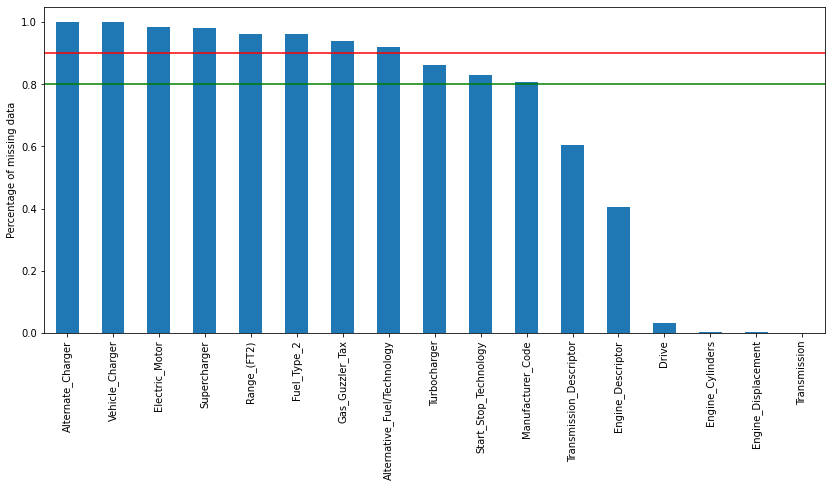

In [8]:
# plotting variables with n/a
df[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(14, 6))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

In [9]:
# printing cardinality
for col in df.columns:
    print(f"{len(df[col].unique()):>4} unique values in {col}")

38113 unique values in Vehicle_ID
  34 unique values in Year
 133 unique values in Make
3748 unique values in Model
  34 unique values in Class
   8 unique values in Drive
  47 unique values in Transmission
  53 unique values in Transmission_Descriptor
2649 unique values in Engine_Index
 545 unique values in Engine_Descriptor
  10 unique values in Engine_Cylinders
  67 unique values in Engine_Displacement
   2 unique values in Turbocharger
   2 unique values in Supercharger
  14 unique values in Fuel_Type
   6 unique values in Fuel_Type_1
   5 unique values in Fuel_Type_2
  93 unique values in City_MPG_(FT1)
3131 unique values in Unrounded_City_MPG_(FT1)
  46 unique values in City_MPG_(FT2)
 424 unique values in Unrounded_City_MPG_(FT2)
   9 unique values in City_Gasoline_Consumption_(CD)
  62 unique values in City_Electricity_Consumption
  41 unique values in City_Utility_Factor
  83 unique values in Highway_MPG_(FT1)
3305 unique values in Unrounded_Highway_MPG_(FT1)
  49 unique value

In [10]:
df.columns

Index(['Vehicle_ID', 'Year', 'Make', 'Model', 'Class', 'Drive', 'Transmission',
       'Transmission_Descriptor', 'Engine_Index', 'Engine_Descriptor',
       'Engine_Cylinders', 'Engine_Displacement', 'Turbocharger',
       'Supercharger', 'Fuel_Type', 'Fuel_Type_1', 'Fuel_Type_2',
       'City_MPG_(FT1)', 'Unrounded_City_MPG_(FT1)', 'City_MPG_(FT2)',
       'Unrounded_City_MPG_(FT2)', 'City_Gasoline_Consumption_(CD)',
       'City_Electricity_Consumption', 'City_Utility_Factor',
       'Highway_MPG_(FT1)', 'Unrounded_Highway_MPG_(FT1)', 'Highway_MPG_(FT2)',
       'Unrounded_Highway_MPG_(FT2)', 'Highway_Gasoline_Consumption_(CD)',
       'Highway_Electricity_Consumption', 'Highway_Utility_Factor',
       'Unadjusted_City_MPG_(FT1)', 'Unadjusted_Highway_MPG_(FT1)',
       'Unadjusted_City_MPG_(FT2)', 'Unadjusted_Highway_MPG_(FT2)',
       'Combined_MPG_(FT1)', 'Unrounded_Combined_MPG_(FT1)',
       'Combined_MPG_(FT2)', 'Unrounded_Combined_MPG_(FT2)',
       'Combined_Electricity_Consu

<h3>Target</h3>

In [11]:
# defining the target
target = 'Combined_MPG_(FT1)'

In [12]:
# dropping other possible targets, vehicle ID and electrical vehicles attributes
cols_to_trop = [
 'Vehicle_ID', 'City_MPG_(FT1)', 'Unrounded_City_MPG_(FT1)', 'City_MPG_(FT2)',
 'Unrounded_City_MPG_(FT2)', 'City_Gasoline_Consumption_(CD)',
 'City_Electricity_Consumption', 'City_Utility_Factor', 'Highway_MPG_(FT1)',
  'Unrounded_Highway_MPG_(FT1)', 'Highway_MPG_(FT2)',
  'Unrounded_Highway_MPG_(FT2)', 'Highway_Gasoline_Consumption_(CD)',
  'Highway_Electricity_Consumption', 'Highway_Utility_Factor',
  'Unadjusted_City_MPG_(FT1)', 'Unadjusted_Highway_MPG_(FT1)',
  'Unadjusted_City_MPG_(FT2)', 'Unadjusted_Highway_MPG_(FT2)',
  'Unrounded_Combined_MPG_(FT1)', 'Combined_MPG_(FT2)',
  'Unrounded_Combined_MPG_(FT2)', 'Combined_Electricity_Consumption',
  'Combined_Gasoline_Consumption_(CD)', 'Combined_Utility_Factor',
  'Annual_Fuel_Cost_(FT1)', 'Annual_Fuel_Cost_(FT2)', 'Gas_Guzzler_Tax',
  'Save_or_Spend_(5_Year)', 'Annual_Consumption_in_Barrels_(FT1)',
  'Annual_Consumption_in_Barrels_(FT2)', 'Tailpipe_CO2_(FT1)',
  'Tailpipe_CO2_in_Grams/Mile_(FT1)', 'Tailpipe_CO2_(FT2)',
  'Tailpipe_CO2_in_Grams/Mile_(FT2)', 'Fuel_Economy_Score', 'GHG_Score',
  'GHG_Score_(Alt_Fuel)', 'My_MPG_Data',  'Alternate_Charger',
  'Hours_to_Charge_(120V)', 'Hours_to_Charge_(240V)',
  'Hours_to_Charge_(AC_240V)', 'Composite_Highway_MPG',
  'Composite_Combined_MPG', 'Range_(FT1)', 'City_Range_(FT1)',
  'Highway_Range_(FT1)', 'Range_(FT2)', 'City_Range_(FT2)',
  'Highway_Range_(FT2)', 'Composite_City_MPG']
df.drop(columns=cols_to_trop, inplace=True)
df.columns

Index(['Year', 'Make', 'Model', 'Class', 'Drive', 'Transmission',
       'Transmission_Descriptor', 'Engine_Index', 'Engine_Descriptor',
       'Engine_Cylinders', 'Engine_Displacement', 'Turbocharger',
       'Supercharger', 'Fuel_Type', 'Fuel_Type_1', 'Fuel_Type_2',
       'Combined_MPG_(FT1)', '2D_Passenger_Volume', '2D_Luggage_Volume',
       '4D_Passenger_Volume', '4D_Luggage_Volume',
       'Hatchback_Passenger_Volume', 'Hatchback_Luggage_Volume',
       'Start_Stop_Technology', 'Alternative_Fuel/Technology',
       'Electric_Motor', 'Manufacturer_Code',
       'Gasoline/Electricity_Blended_(CD)', 'Vehicle_Charger'],
      dtype='object')

In [13]:
# identifying categorical values
# capturing type object and boolean
cat_vars = [var for var in df.columns if df[var].dtype in ['O', 'bool']]
print(f"There are {len(cat_vars)} categorical variables")
cat_vars

There are 18 categorical variables


['Make',
 'Model',
 'Class',
 'Drive',
 'Transmission',
 'Transmission_Descriptor',
 'Engine_Descriptor',
 'Turbocharger',
 'Supercharger',
 'Fuel_Type',
 'Fuel_Type_1',
 'Fuel_Type_2',
 'Start_Stop_Technology',
 'Alternative_Fuel/Technology',
 'Electric_Motor',
 'Manufacturer_Code',
 'Gasoline/Electricity_Blended_(CD)',
 'Vehicle_Charger']

<h3>Numerical variables</h3>

In [14]:
# identifying the numerical variables
num_vars = [var for var in df.columns if var not in cat_vars]
print(f"There are {len(num_vars)} numerical variables")
num_vars

There are 11 numerical variables


['Year',
 'Engine_Index',
 'Engine_Cylinders',
 'Engine_Displacement',
 'Combined_MPG_(FT1)',
 '2D_Passenger_Volume',
 '2D_Luggage_Volume',
 '4D_Passenger_Volume',
 '4D_Luggage_Volume',
 'Hatchback_Passenger_Volume',
 'Hatchback_Luggage_Volume']

In [15]:
# function to create histogram, Q-Q plot and boxplot
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

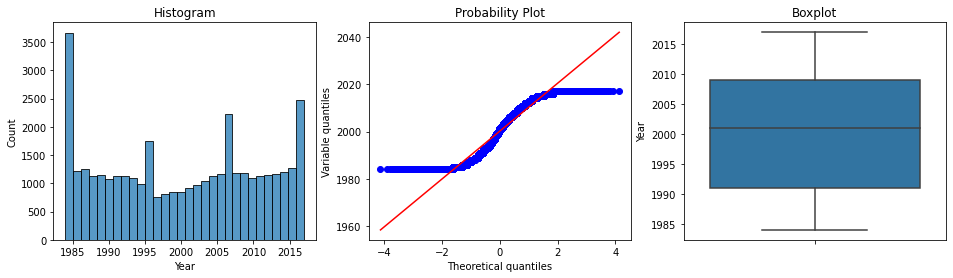

Skewness of Year is -0.02


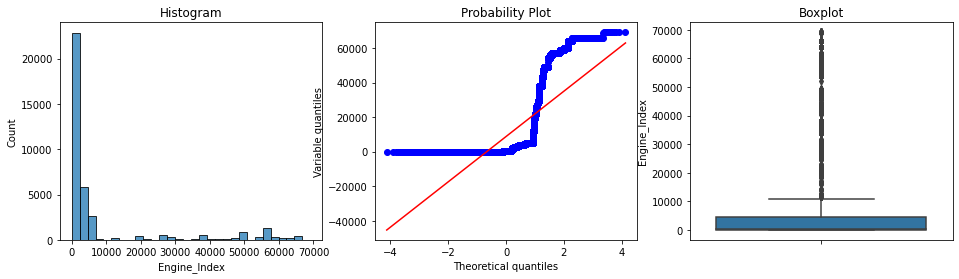

Skewness of Engine_Index is 2.09


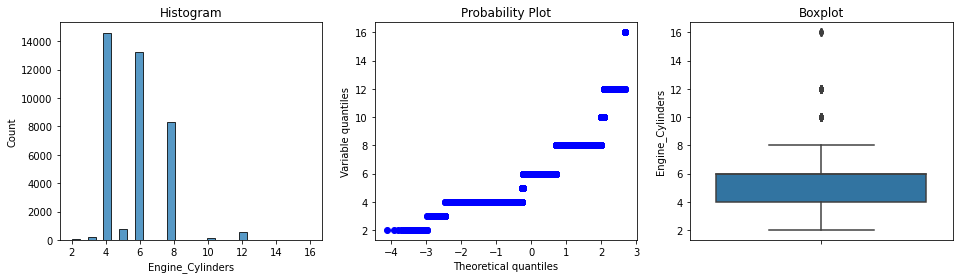

Skewness of Engine_Cylinders is 0.85


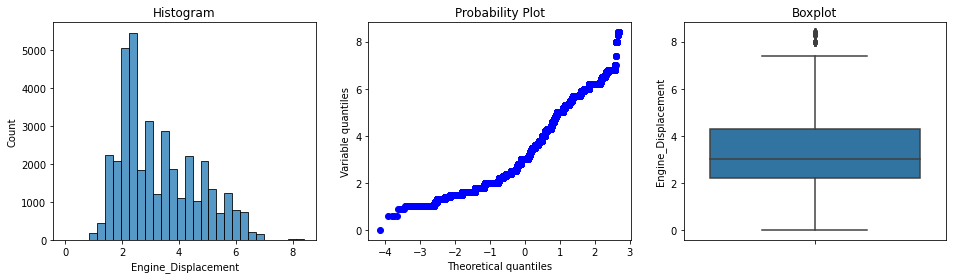

Skewness of Engine_Displacement is 0.62


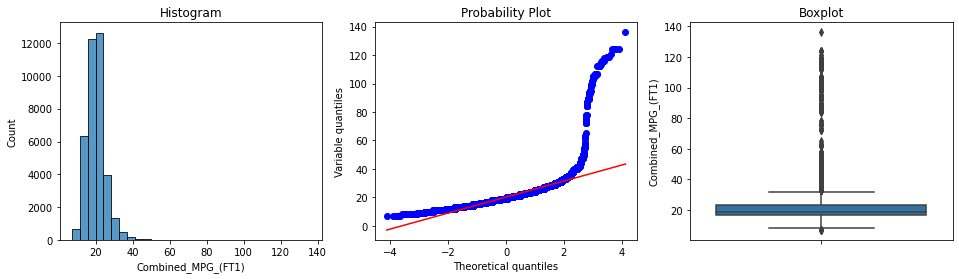

Skewness of Combined_MPG_(FT1) is 5.73


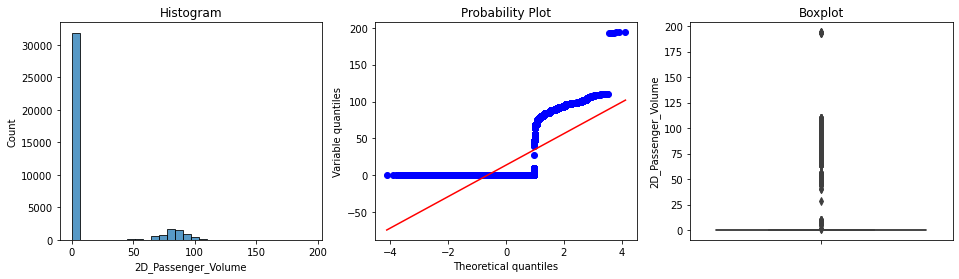

Skewness of 2D_Passenger_Volume is 1.90


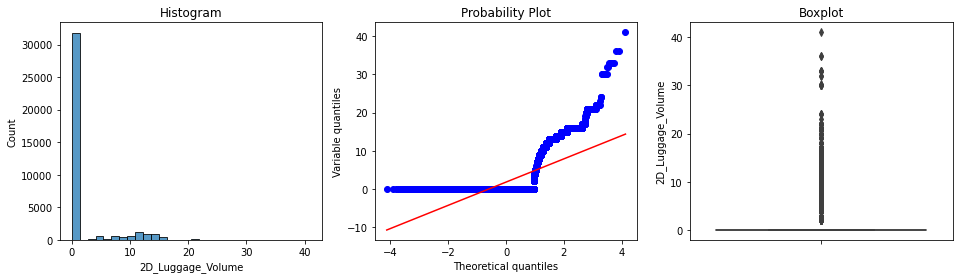

Skewness of 2D_Luggage_Volume is 2.29


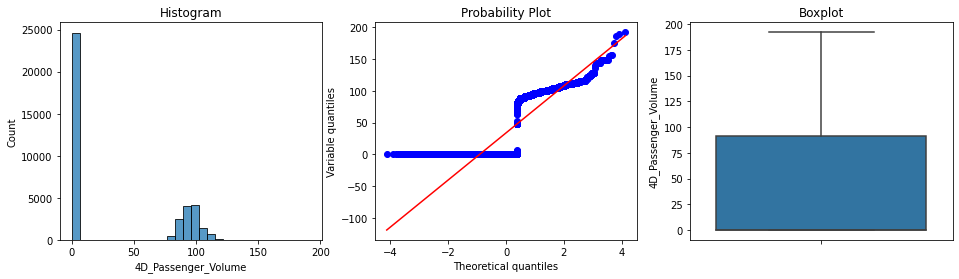

Skewness of 4D_Passenger_Volume is 0.65


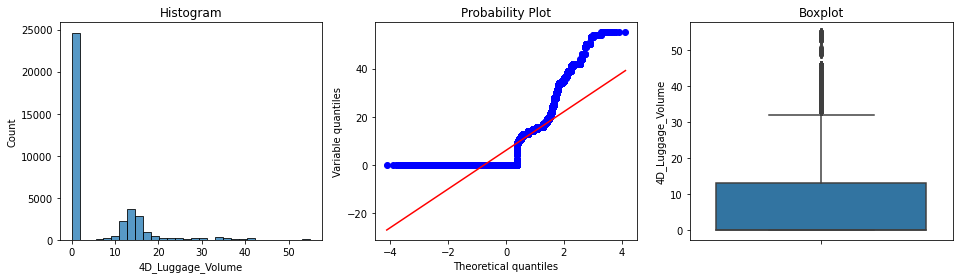

Skewness of 4D_Luggage_Volume is 1.78


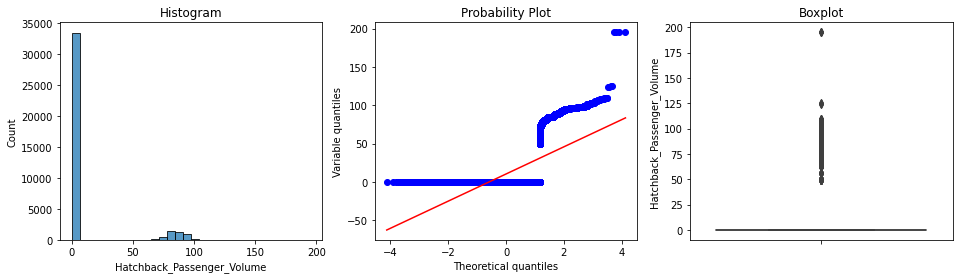

Skewness of Hatchback_Passenger_Volume is 2.37


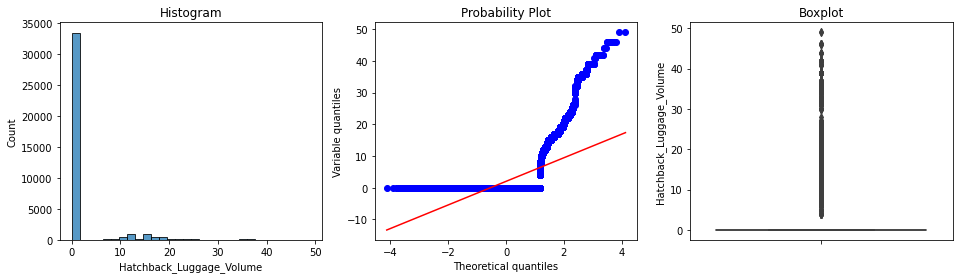

Skewness of Hatchback_Luggage_Volume is 3.28


In [16]:
# plotting numerical variables
for variable in num_vars:
    diagnostic_plots(df, variable)
    # printing skewness
    skewness = df[variable].skew()
    print("Skewness of", variable, "is {:.2f}".format(skewness))

Discussion: the tagret is right skewed. Variables related to volumes have many zeros.

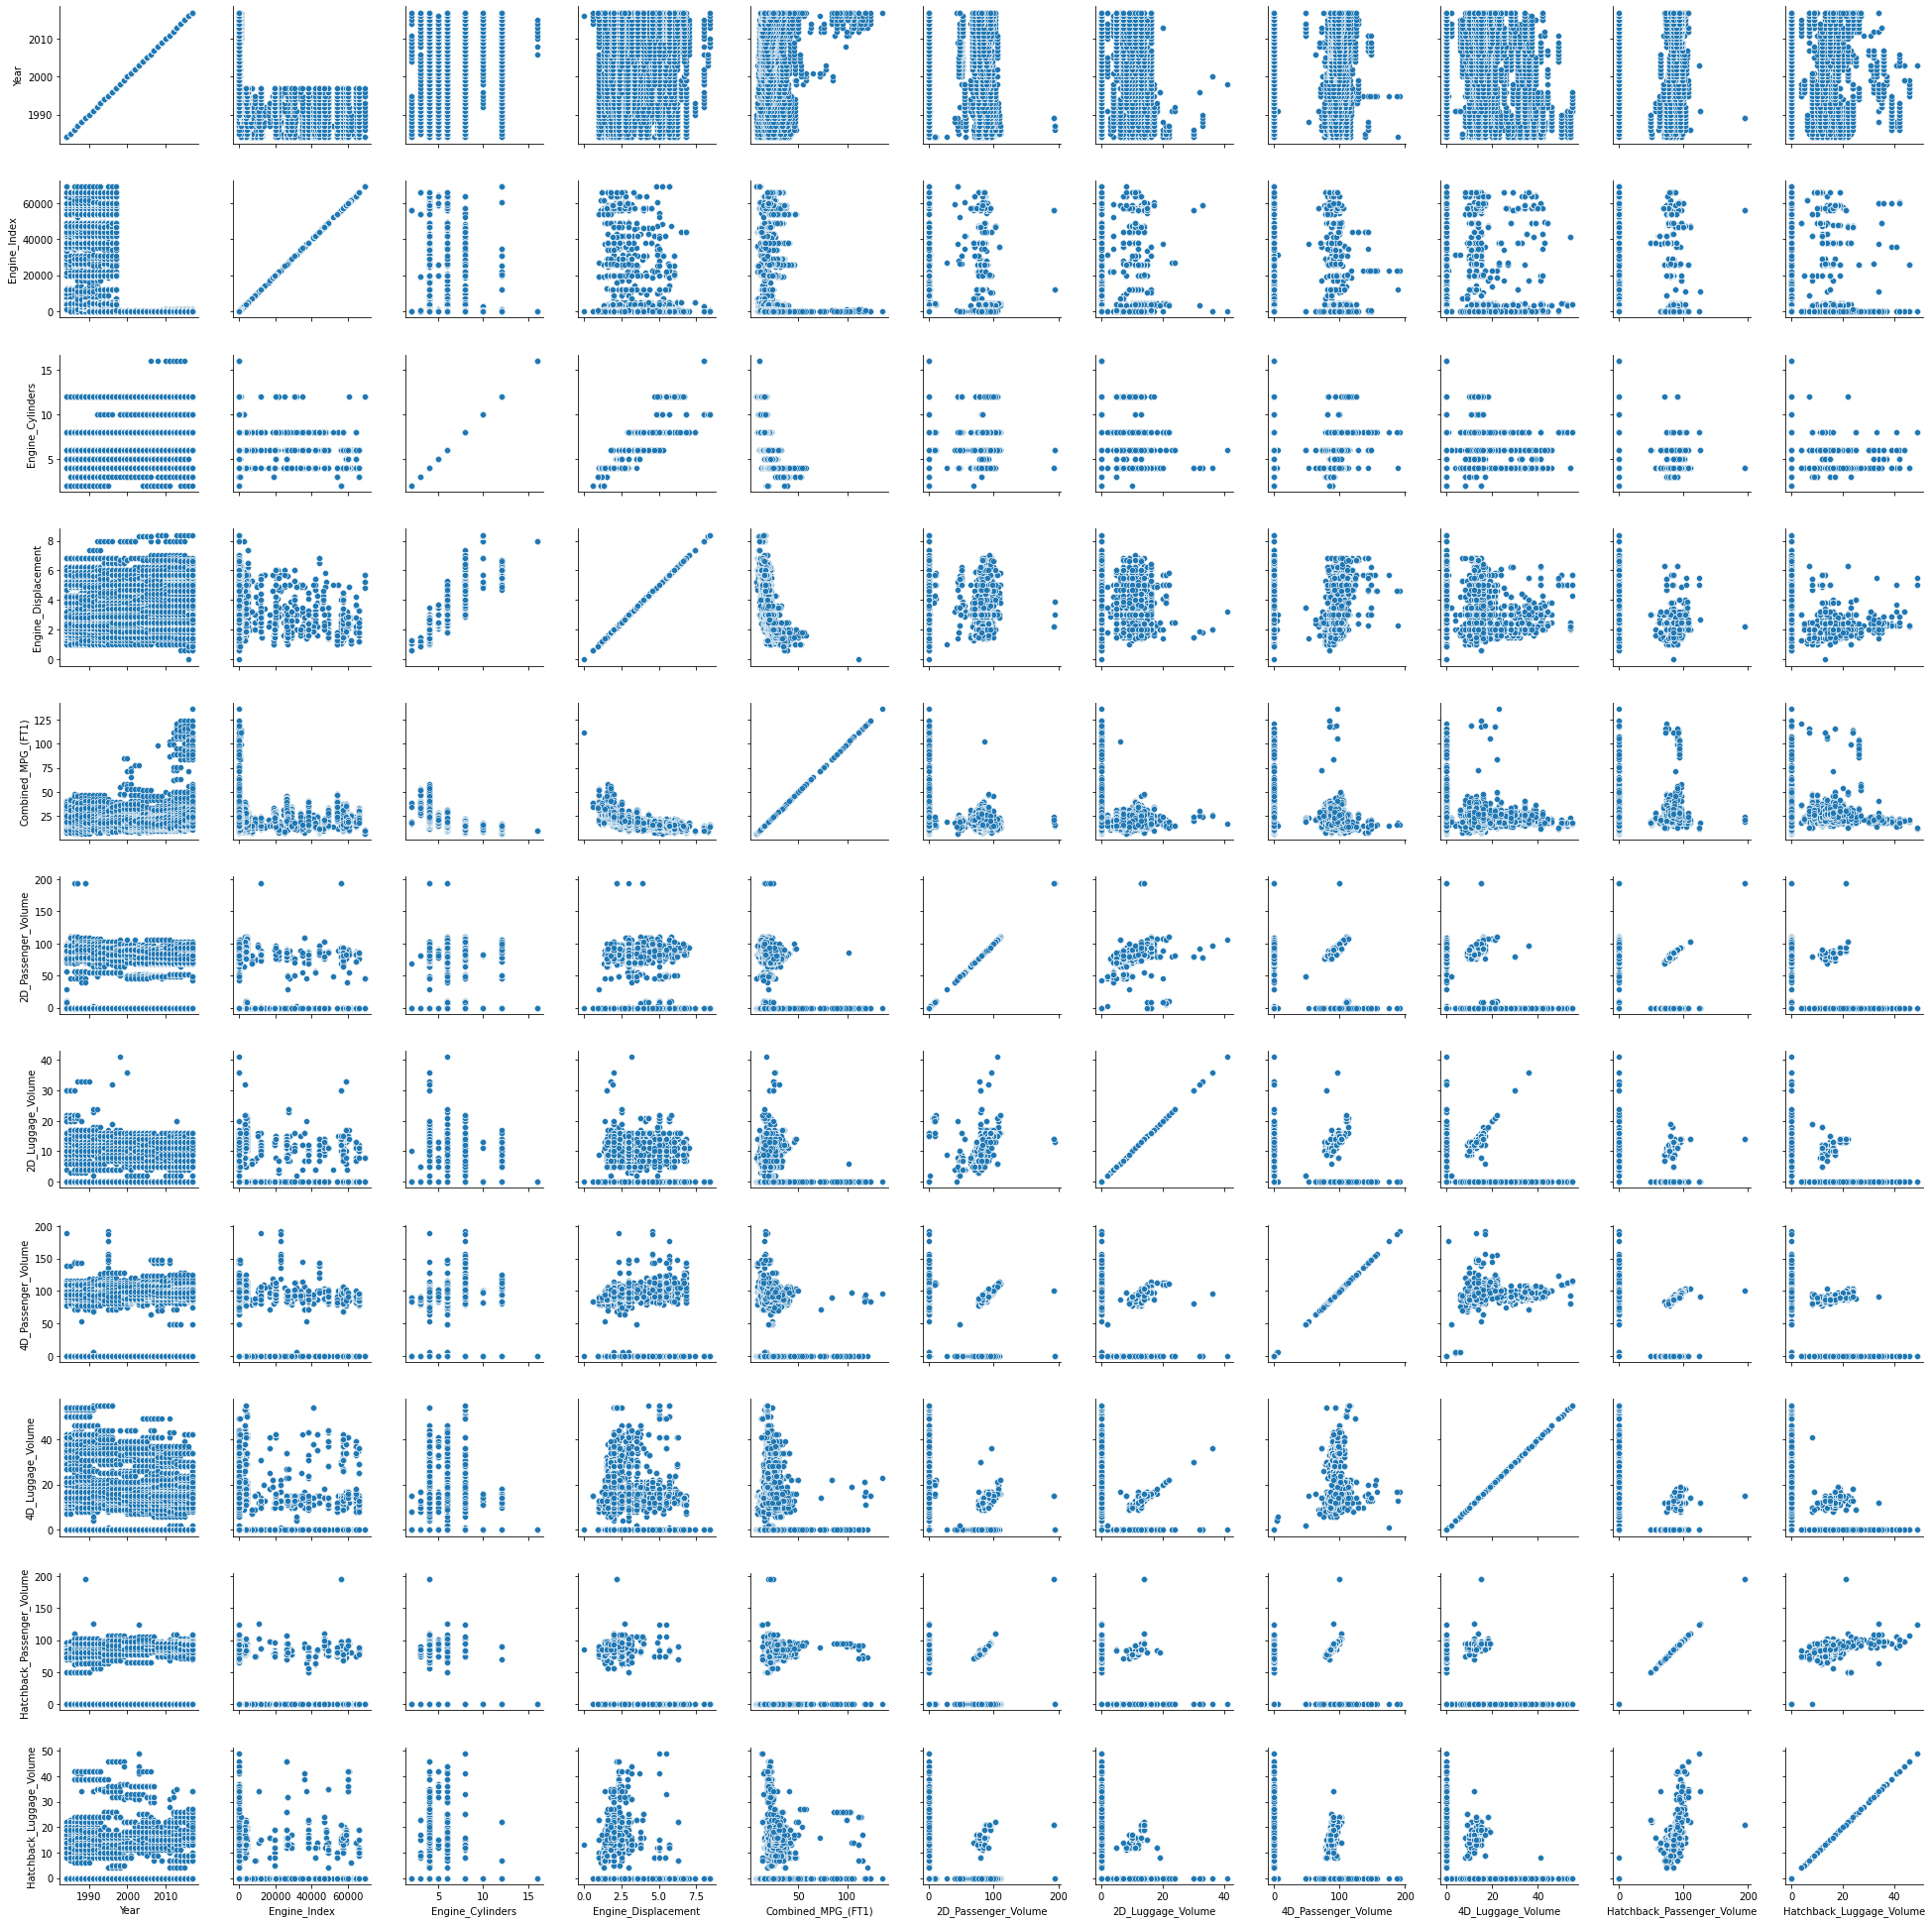

In [17]:
# plotting scatterplots with pairs of numerical variables
g = sns.PairGrid(df[num_vars])
g.map(sns.scatterplot)

Discussion: volume-related variables are inter-correlataed. Engine cylinders and displacement are correlated. Engine index highly depends on year.

In [18]:
# removing target from the list of numerical variables
num_vars.remove(target)
print(f"There are {len(num_vars)} numerical variables")
num_vars

There are 10 numerical variables


['Year',
 'Engine_Index',
 'Engine_Cylinders',
 'Engine_Displacement',
 '2D_Passenger_Volume',
 '2D_Luggage_Volume',
 '4D_Passenger_Volume',
 '4D_Luggage_Volume',
 'Hatchback_Passenger_Volume',
 'Hatchback_Luggage_Volume']

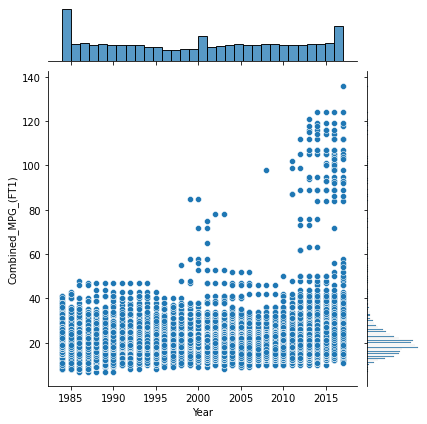

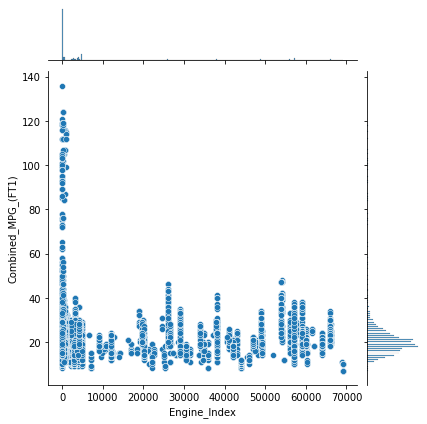

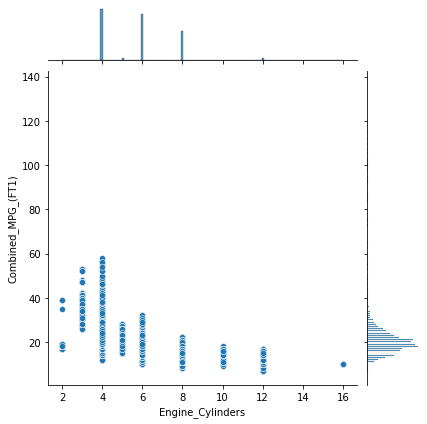

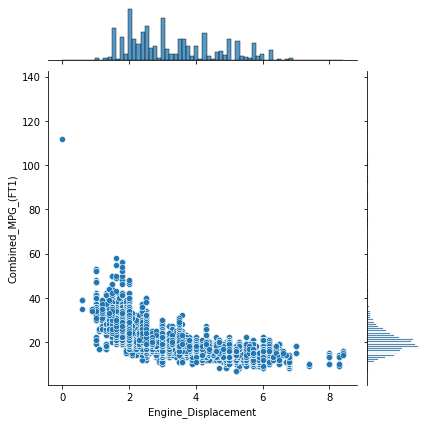

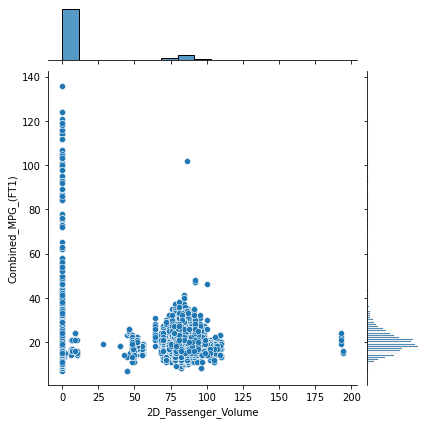

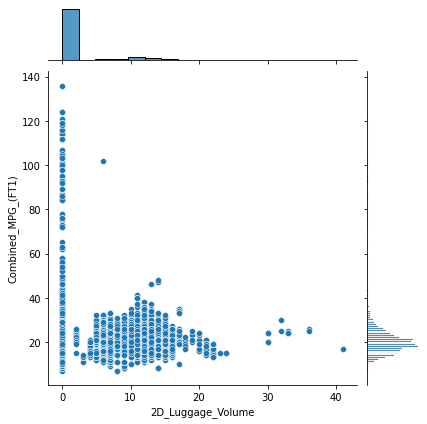

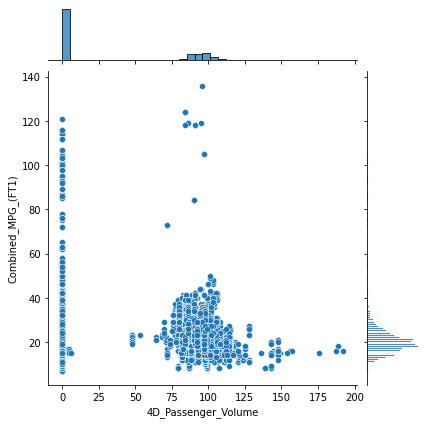

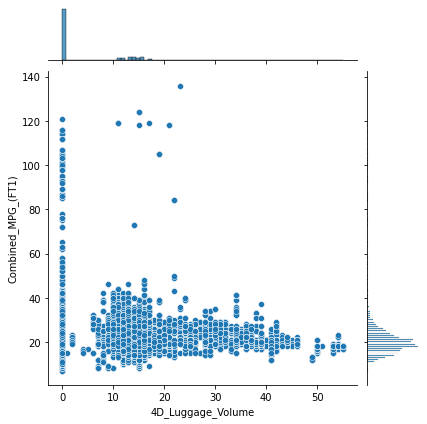

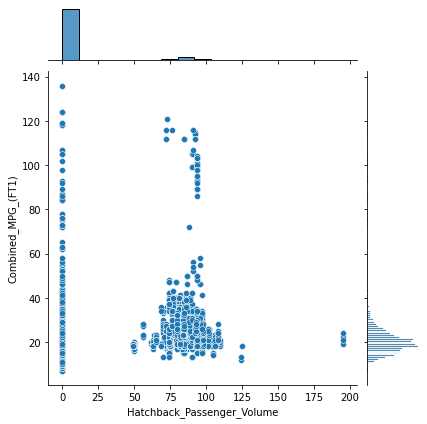

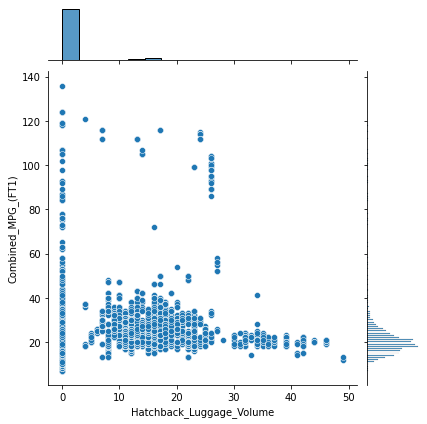

In [19]:
# closer look at influence of numerical variables on the targer
for var in num_vars:
    sns.jointplot(data=df, x=var, y=target)

Discussion: MPG grows with year, high for small engine index, low for many cylinders, and high displacement. MPG doesn't seem to be strongly dependent on volume-related variables.

<h3>Categorical variables</h3>

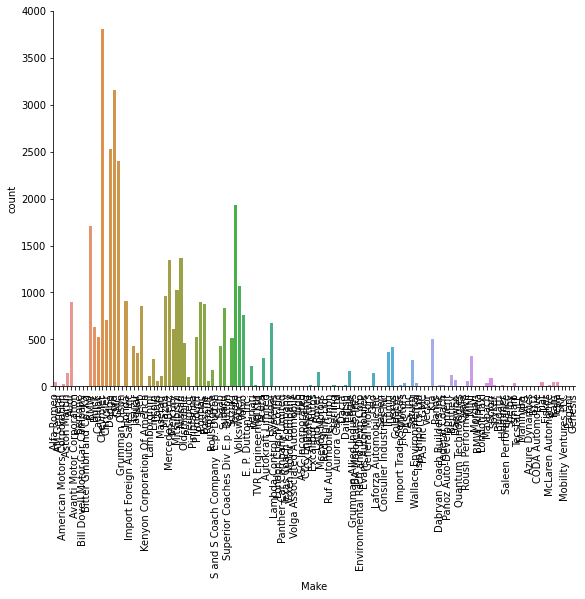

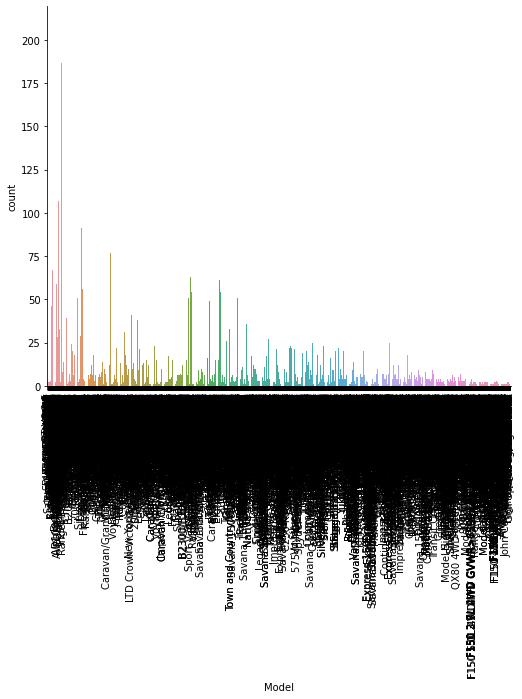

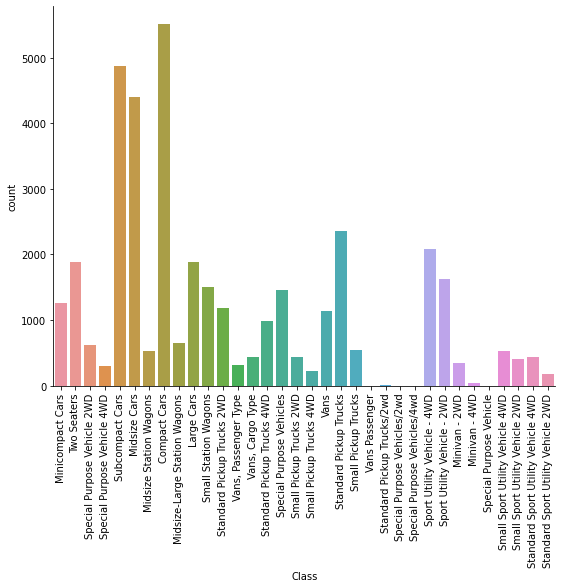

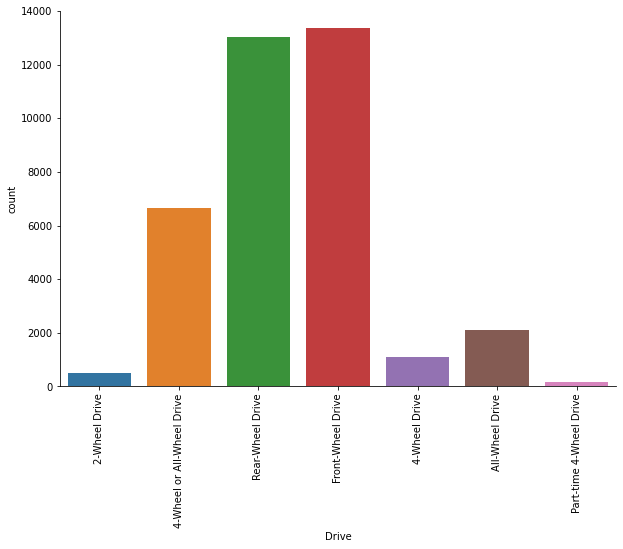

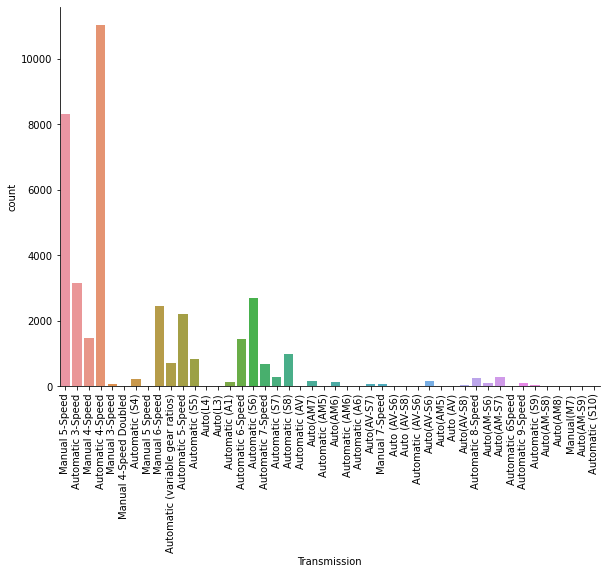

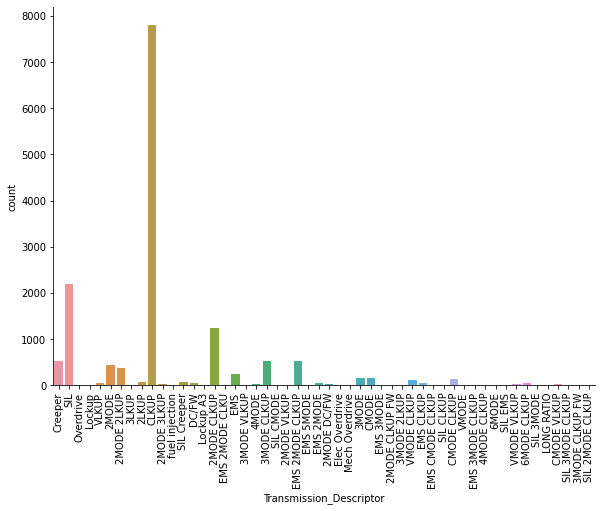

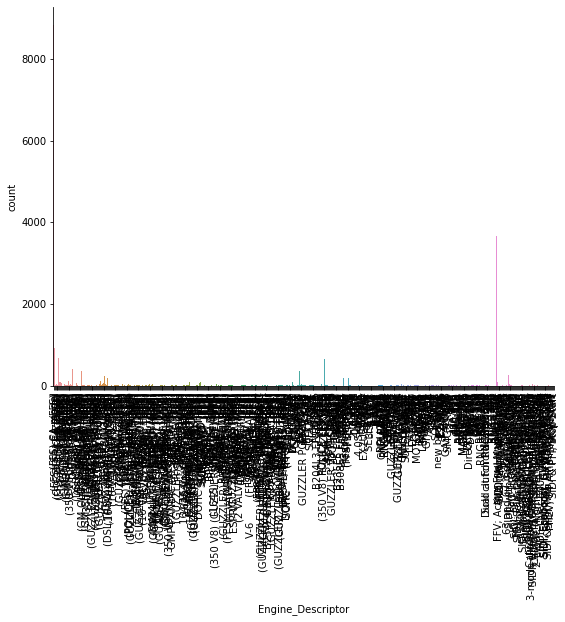

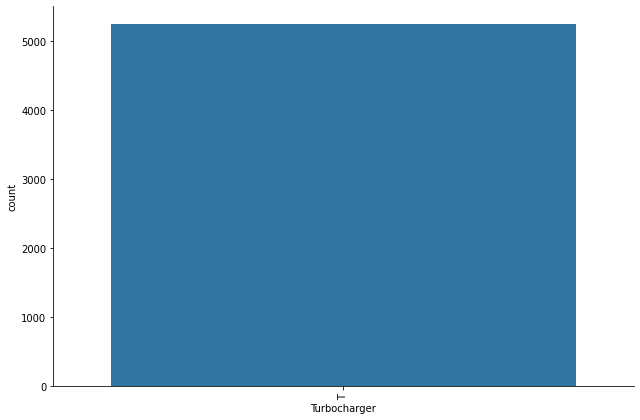

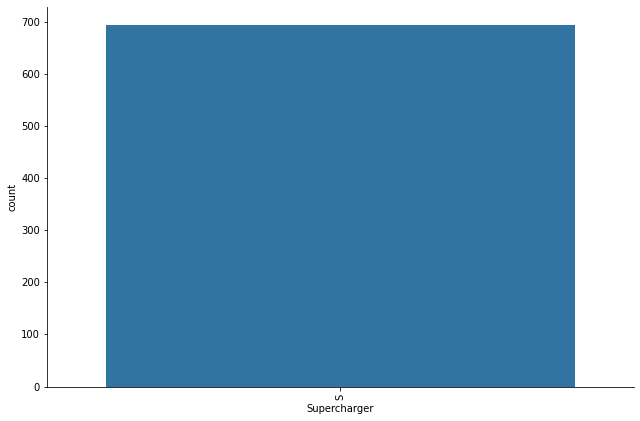

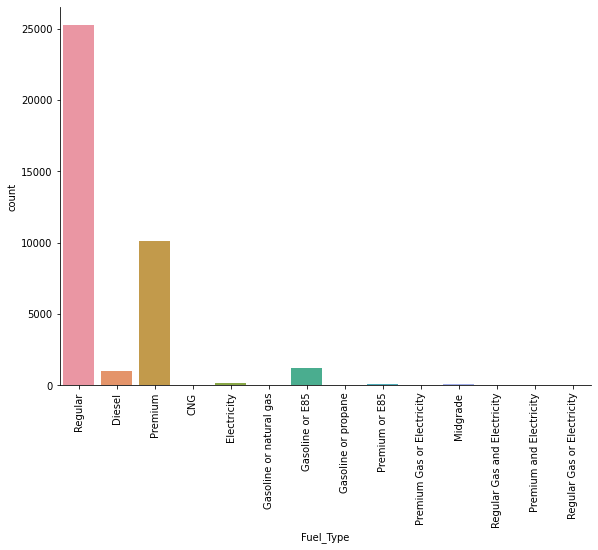

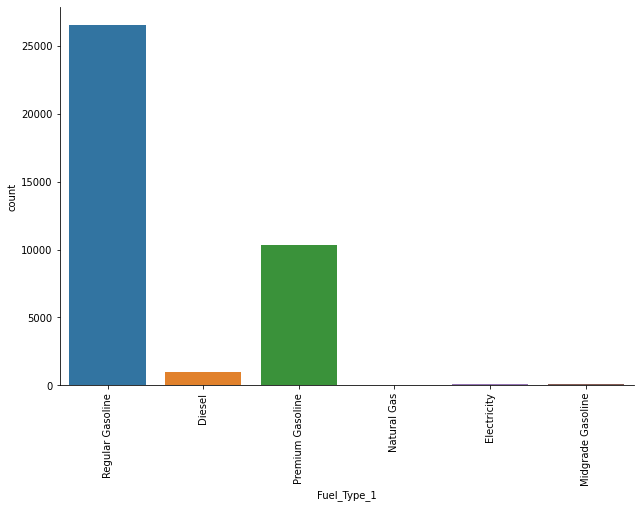

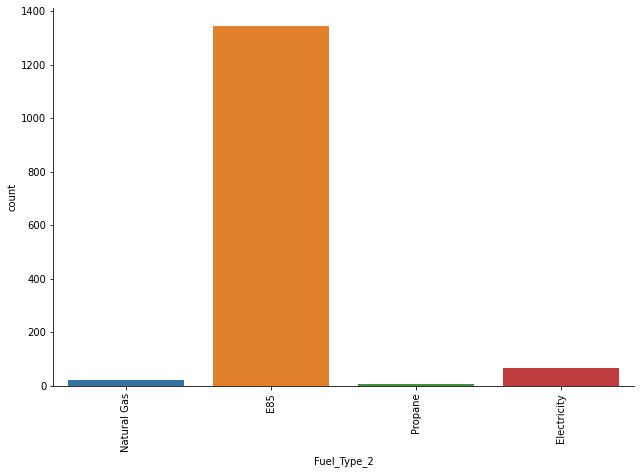

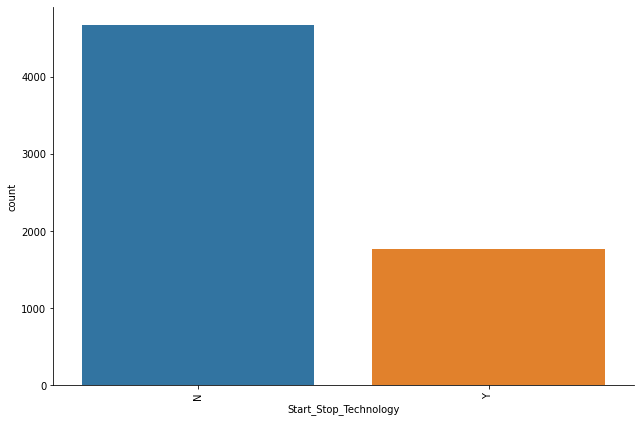

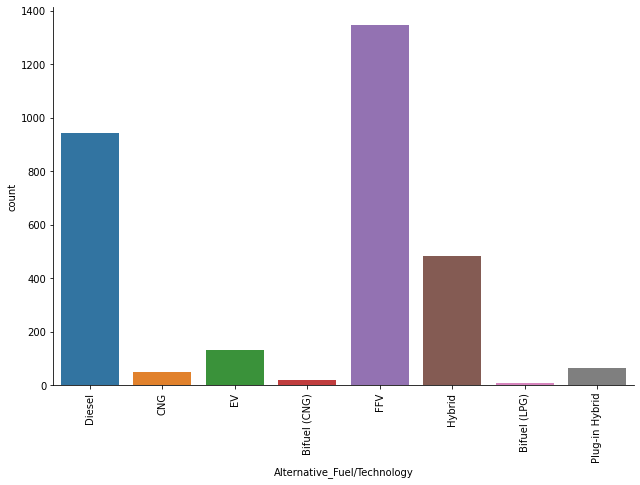

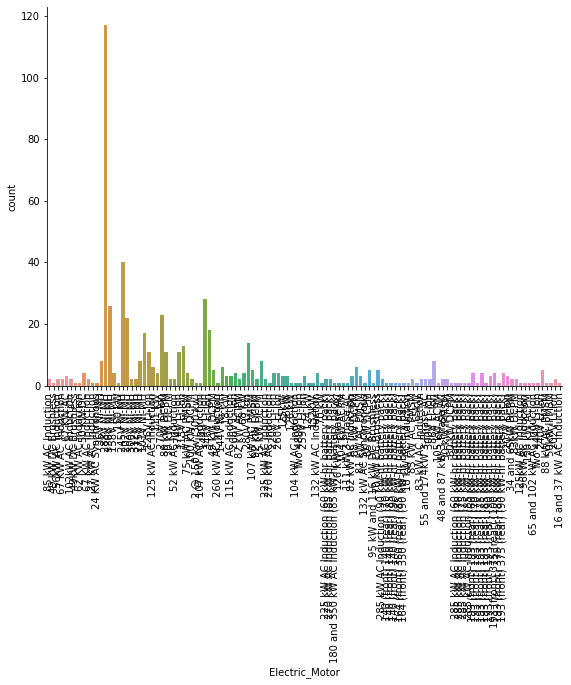

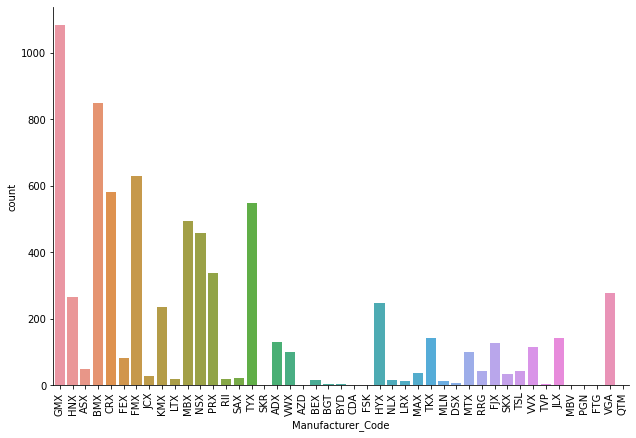

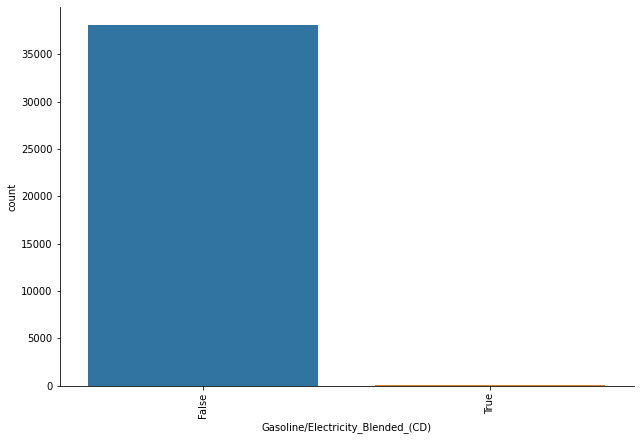

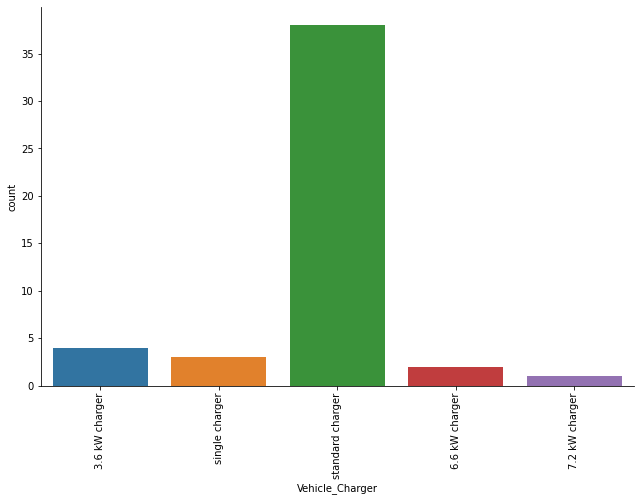

In [20]:
# plotting categorical variables
for var in cat_vars:
    ax = sns.catplot(var, data=df, kind='count', height=6, aspect=1.5)
    plt.xticks(rotation = 'vertical')

<b>Discussion:</b><br>
'Make' - high cardinality,<br>
'Model' - very high cardinality,<br>
'Class' - some classes are very similar or the same,<br>
'Drive' - some drives are very similar or the same,<br>
'Transmission' - some transmissions are very similar or the same,<br>
'Transmission_Descriptor' - high cardinality,<br>
'Engine_Descriptor' - very high cardinality,<br>
'Turbocharger' - boolean,<br>
'Supercharger' - boolean,<br>
'Fuel_Type' - combines variables 'Fuel_Type_1' and 'Fuel_Type_2',<br>
'Fuel_Type_1',<br>
'Fuel_Type_2',<br>
'Start_Stop_Technology',<br>
'Alternative_Fuel/Technology',<br>
'Electric_Motor' - very high cardinality,<br>
'Manufacturer_Code' - high cardinality,<br>
'Gasoline/Electricity_Blended_(CD) - imbalanced',<br>
'Vehicle_Charger' - not relevant.

<b>Make</b>

In [21]:
# counting the values
df['Make'].value_counts(dropna=False)

Chevrolet                             3810
Ford                                  3155
Dodge                                 2531
GMC                                   2398
Toyota                                1937
BMW                                   1712
Nissan                                1372
Mercedes-Benz                         1349
Volkswagen                            1069
Mitsubishi                            1029
Mazda                                  959
Honda                                  905
Audi                                   901
Pontiac                                893
Porsche                                881
Jeep                                   851
Subaru                                 836
Volvo                                  759
Chrysler                               710
Hyundai                                670
Buick                                  630
Mercury                                609
Cadillac                               528
Plymouth   

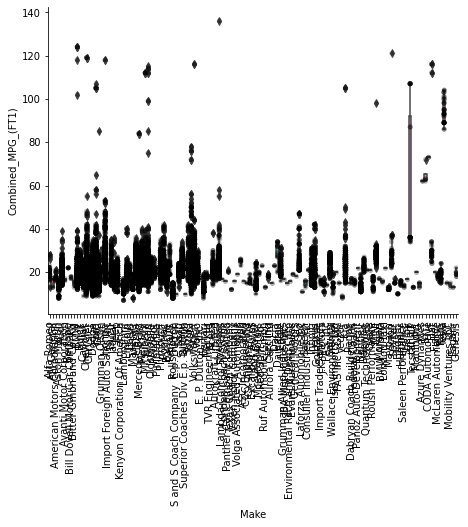

In [22]:
# make boxplot with Catplot
var = 'Make'
sns.catplot(x=var, y=target, data=df, kind="box", height=5, aspect=1.5)
# add data points to boxplot with stripplot
sns.stripplot(x=var, y=target, data=df, jitter=0.1, alpha=0.3, color='k')
plt.xticks(rotation = 'vertical')
plt.show()

Discussion: the target varies with 'Make'.

<b>Class</b>

In [23]:
# counting the values
df['Class'].value_counts(dropna=False)

Compact Cars                          5508
Subcompact Cars                       4872
Midsize Cars                          4395
Standard Pickup Trucks                2354
Sport Utility Vehicle - 4WD           2082
Large Cars                            1891
Two Seaters                           1886
Sport Utility Vehicle - 2WD           1627
Small Station Wagons                  1499
Special Purpose Vehicles              1455
Minicompact Cars                      1260
Standard Pickup Trucks 2WD            1177
Vans                                  1141
Standard Pickup Trucks 4WD             986
Midsize-Large Station Wagons           656
Special Purpose Vehicle 2WD            613
Small Pickup Trucks                    538
Small Sport Utility Vehicle 4WD        526
Midsize Station Wagons                 523
Vans, Cargo Type                       438
Small Pickup Trucks 2WD                436
Standard Sport Utility Vehicle 4WD     434
Small Sport Utility Vehicle 2WD        403
Minivan - 2

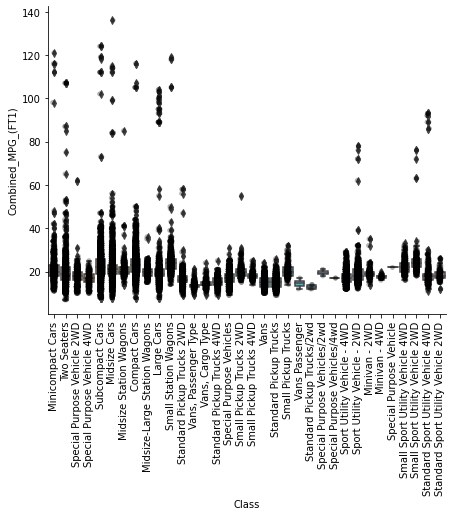

In [24]:
# make boxplot with Catplot
var = 'Class'
sns.catplot(x=var, y=target, data=df, kind="box", height=5, aspect=1.5)
# add data points to boxplot with stripplot
sns.stripplot(x=var, y=target, data=df, jitter=0.1, alpha=0.3, color='k')
plt.xticks(rotation = 'vertical')
plt.show()

Discussion: the target varies with 'Class'.

<b>Drive</b>

In [25]:
# counting the values
df['Drive'].value_counts(dropna=False)

Front-Wheel Drive             13351
Rear-Wheel Drive              13018
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                2121
NaN                            1189
4-Wheel Drive                  1103
2-Wheel Drive                   507
Part-time 4-Wheel Drive         176
Name: Drive, dtype: int64

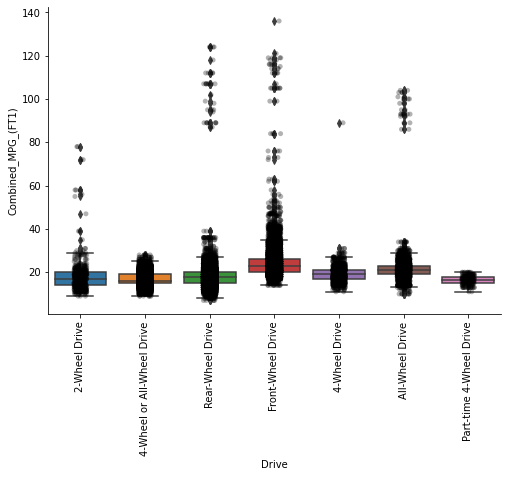

In [26]:
# make boxplot with Catplot
var = 'Drive'
sns.catplot(x=var, y=target, data=df, kind="box", height=5, aspect=1.5)
# add data points to boxplot with stripplot
sns.stripplot(x=var, y=target, data=df, jitter=0.1, alpha=0.3, color='k')
plt.xticks(rotation = 'vertical')
plt.show()

Discussion: front wheel dribe outperforms other drives in MPG

<b>Transmission</b>

In [27]:
# counting the values
df['Transmission'].value_counts(dropna=False)

Automatic 4-Speed                   11042
Manual 5-Speed                       8323
Automatic 3-Speed                    3151
Automatic (S6)                       2684
Manual 6-Speed                       2448
Automatic 5-Speed                    2191
Manual 4-Speed                       1483
Automatic 6-Speed                    1447
Automatic (S8)                        977
Automatic (S5)                        827
Automatic (variable gear ratios)      702
Automatic 7-Speed                     675
Automatic (S7)                        270
Auto(AM-S7)                           266
Automatic 8-Speed                     259
Automatic (S4)                        233
Auto(AM7)                             166
Auto(AV-S6)                           153
Automatic (A1)                        124
Auto(AM6)                             120
Automatic 9-Speed                     105
Auto(AM-S6)                            87
Auto(AV-S7)                            80
Manual 3-Speed                    

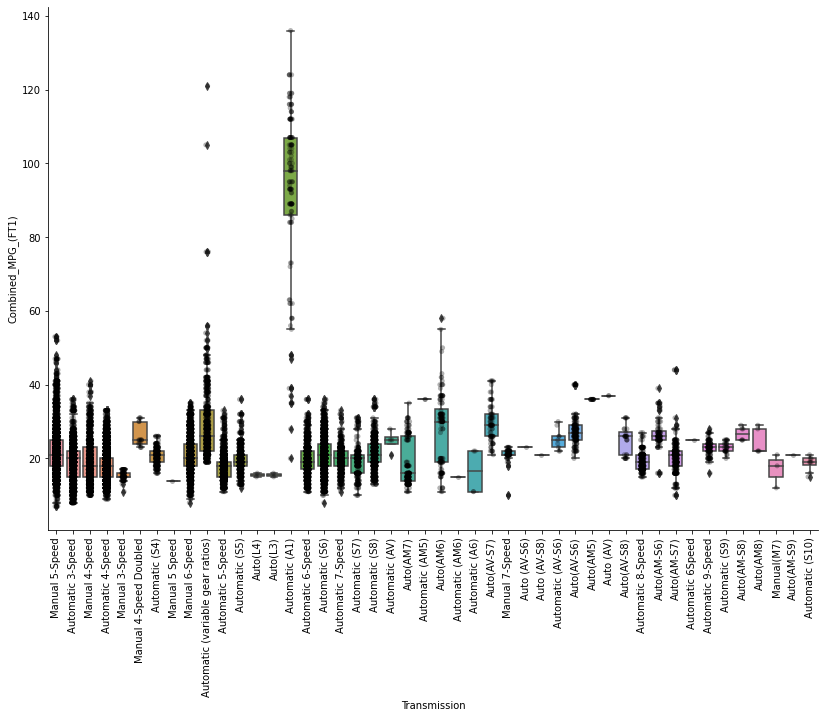

In [28]:
# make boxplot with Catplot
var = 'Transmission'
sns.catplot(x=var, y=target, data=df, kind="box", height=8, aspect=1.5)
# add data points to boxplot with stripplot
sns.stripplot(x=var, y=target, data=df, jitter=0.1, alpha=0.3, color='k')
plt.xticks(rotation = 'vertical')
plt.show()

Discussion: higher numbers of gears gives higher MPG. Automatic A1 outperforms all the rest.

<b>Turbocharger</b>

In [29]:
# counting the values
df['Turbocharger'].value_counts(dropna=False)

NaN    32874
T       5239
Name: Turbocharger, dtype: int64

In [30]:
# make boxplot with Catplot
var = 'Turbocharger'
print(f"{df[df[var] == 'T'][target].mean():.2f} MPG mean with {var}")
print(f"{df[df[var].isnull() == True][target].mean():.2f} MPG mean w/o {var}")

21.65 MPG mean with Turbocharger
19.99 MPG mean w/o Turbocharger


Discussion: ~8% better performance with turbochager.

<b>Supercharger</b>

In [31]:
# counting the values
df['Supercharger'].value_counts(dropna=False)

NaN    37420
S        693
Name: Supercharger, dtype: int64

In [32]:
# make boxplot with Catplot
var = 'Supercharger'
print(f"{df[df[var] == 'S'][target].mean():.2f} MPG mean with {var}")
print(f"{df[df[var].isnull() == True][target].mean():.2f} MPG mean w/o {var}")

18.32 MPG mean with Supercharger
20.25 MPG mean w/o Supercharger


Discussion: ~10.5% better performance w/o superchager.

<b>Fuel_Type_1</b>

In [33]:
# counting the values
df['Fuel_Type_1'].value_counts(dropna=False)

Regular Gasoline     26531
Premium Gasoline     10298
Diesel                1014
Electricity            133
Midgrade Gasoline       77
Natural Gas             60
Name: Fuel_Type_1, dtype: int64

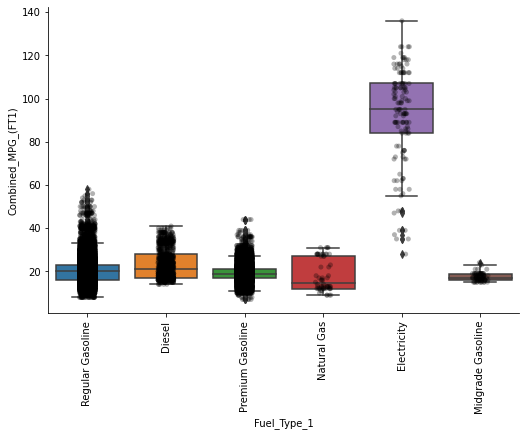

In [34]:
# make boxplot with Catplot
var = 'Fuel_Type_1'
sns.catplot(x=var, y=target, data=df, kind="box", height=5, aspect=1.5)
# add data points to boxplot with stripplot
sns.stripplot(x=var, y=target, data=df, jitter=0.1, alpha=0.3, color='k')
plt.xticks(rotation = 'vertical')
plt.show()

Discussion: gasolines are the same, diesel - better, electricity - the best. Natural gas is worst.

<b>Fuel_Type_2</b>

In [35]:
# counting the values
df['Fuel_Type_2'].value_counts(dropna=False)

NaN            36675
E85             1345
Electricity       65
Natural Gas       20
Propane            8
Name: Fuel_Type_2, dtype: int64

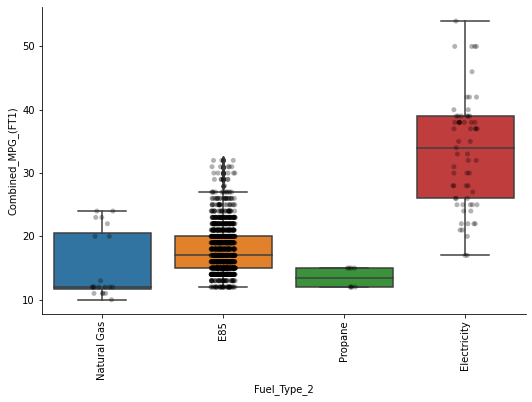

In [36]:
# make boxplot with Catplot
var = 'Fuel_Type_2'
sns.catplot(x=var, y=target, data=df, kind="box", height=5, aspect=1.5)
# add data points to boxplot with stripplot
sns.stripplot(x=var, y=target, data=df, jitter=0.1, alpha=0.3, color='k')
plt.xticks(rotation = 'vertical')
plt.show()

Discussion: electricity outperforms all the rest.

<b>Start_Stop_Technology</b>

In [37]:
# counting the values
df['Start_Stop_Technology'].value_counts(dropna=False)

NaN    31670
N       4677
Y       1766
Name: Start_Stop_Technology, dtype: int64

In [38]:
# make boxplot with Catplot
var = 'Start_Stop_Technology'
print(f"{df[df[var] == 'Y'][target].mean():.2f} MPG mean with {var}")
perf_wo = df[(df[var] == 'N') | (df[var].isnull() == True)][target].mean()
print(f"{perf_wo:.2f} MPG mean w/o {var}")

24.97 MPG mean with Start_Stop_Technology
19.99 MPG mean w/o Start_Stop_Technology


Discussion: Start_Stop_Technology improves MPG by 25%.

<b>Alternative_Fuel/Technology</b>

In [39]:
# counting the values
df['Fuel_Type_1'].value_counts(dropna=False)

Regular Gasoline     26531
Premium Gasoline     10298
Diesel                1014
Electricity            133
Midgrade Gasoline       77
Natural Gas             60
Name: Fuel_Type_1, dtype: int64

Discussion: duplicates Fuel_Type_2.

<b>Gasoline/Electricity_Blended_(CD)</b>

In [40]:
# counting the values
df['Gasoline/Electricity_Blended_(CD)'].value_counts(dropna=False)

False    38068
True        45
Name: Gasoline/Electricity_Blended_(CD), dtype: int64

Discussion: quasi-constant.